In [85]:
import pandas as pd
import numpy as np

In [86]:
news_data = pd.read_csv('data/TSLA-NEWS-60DAYS-2024-03-23-2024-05-20.csv')
news_data.head()

,id,datetime,impact,headline,summary
0,127801754,2024-05-20 23:50:46,neutral,June Will Be an Extremely Important Month for ...,Here's everything you need to know about the e...
1,127800344,2024-05-20 22:45:00,neutral,"Fed Trader Talks TLT, Nvidia Bullishness, Tesl...",Fed Trader Chaim Siegel talks inflation and TL...
2,127799059,2024-05-20 22:10:58,neutral,Magnificent Seven? Just Two Members Clear This...,"Ultimately, earnings drive share prices. Only ..."
3,127801756,2024-05-20 21:38:06,negative,Chaos Reigns Inside Tesla as Workers Await Nex...,(Bloomberg) -- Tesla Inc. workers are living i...
4,127801582,2024-05-20 20:37:00,neutral,Why Tesla’s Stock Can’t Break Above $200,Looking for stock market analysis and research...


# Add Sentiment Score to news

In [87]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [88]:
news_analyzer = SentimentIntensityAnalyzer()

In [89]:
def computerSentimentScore(text: str) -> float:
    vs = news_analyzer.polarity_scores(text)
    return vs['compound']

In [90]:
computerSentimentScore(news_data['summary'][2])

0.8271

In [91]:
news_data['sentscore'] = news_data['summary'].apply(lambda x:computerSentimentScore(str(x)))

In [92]:
news_data.head()

,id,datetime,impact,headline,summary,sentscore
0,127801754,2024-05-20 23:50:46,neutral,June Will Be an Extremely Important Month for ...,Here's everything you need to know about the e...,0.0000
1,127800344,2024-05-20 22:45:00,neutral,"Fed Trader Talks TLT, Nvidia Bullishness, Tesl...",Fed Trader Chaim Siegel talks inflation and TL...,0.0000
2,127799059,2024-05-20 22:10:58,neutral,Magnificent Seven? Just Two Members Clear This...,"Ultimately, earnings drive share prices. Only ...",0.8271
3,127801756,2024-05-20 21:38:06,negative,Chaos Reigns Inside Tesla as Workers Await Nex...,(Bloomberg) -- Tesla Inc. workers are living i...,-0.7351
4,127801582,2024-05-20 20:37:00,neutral,Why Tesla’s Stock Can’t Break Above $200,Looking for stock market analysis and research...,0.0000


In [93]:
news_data = news_data.set_index('datetime')

In [94]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3188 entries, 2024-05-20 23:50:46 to 2024-03-23 09:58:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3188 non-null   int64  
 1   impact     3188 non-null   object 
 2   headline   3188 non-null   object 
 3   summary    3180 non-null   object 
 4   sentscore  3188 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 149.4+ KB


In [95]:
news_data.shape

(3188, 5)

In [96]:
news_score_data = (news_data.dropna())[['sentscore']]

In [97]:
news_score_data.info

<bound method DataFrame.info of                      sentscore
datetime                      
2024-05-20 23:50:46     0.0000
2024-05-20 22:45:00     0.0000
2024-05-20 22:10:58     0.8271
2024-05-20 21:38:06    -0.7351
2024-05-20 20:37:00     0.0000
...                        ...
2024-03-23 13:04:00     0.0000
2024-03-23 11:18:00     0.0000
2024-03-23 11:04:00     0.0000
2024-03-23 10:01:00     0.0000
2024-03-23 09:58:00     0.0000

[3180 rows x 1 columns]>

In [98]:
news_score_data.shape

(3180, 1)

In [99]:
from darts import TimeSeries

In [100]:
news_score_data.index = pd.to_datetime(news_score_data.index).tz_localize(None)
news_score_data_avg = news_score_data.resample('30min').mean()

In [101]:
news_score_data_avg.shape

(2813, 1)

In [102]:
news_score_data_avg = news_score_data_avg.dropna()
news_score_data_avg.shape

(1461, 1)

In [103]:
news_score_data_avg.info

<bound method DataFrame.info of                      sentscore
datetime                      
2024-03-23 09:30:00     0.0000
2024-03-23 10:00:00     0.0000
2024-03-23 11:00:00     0.0000
2024-03-23 13:00:00     0.0000
2024-03-23 15:00:00     0.5719
...                        ...
2024-05-20 20:30:00     0.0000
2024-05-20 21:30:00    -0.7351
2024-05-20 22:00:00     0.8271
2024-05-20 22:30:00     0.0000
2024-05-20 23:30:00     0.0000

[1461 rows x 1 columns]>

In [104]:
news_score_data_ts = TimeSeries.from_dataframe(news_score_data_avg,
                                               fill_missing_dates=False,
                                               fillna_value=0,
                                               freq='30min')

<Axes: xlabel='datetime'>

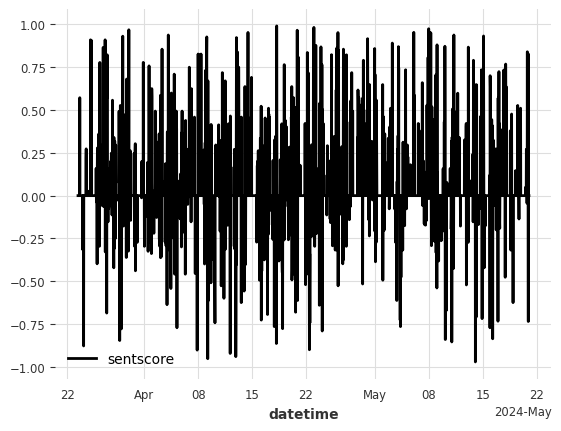

In [105]:
news_score_data_ts.plot()

In [106]:
news_score_data_ts.to_csv('data/prepared/news_score_data.csv')

# Gather the stock data with minute

In [107]:
import yfinance as yf

https://github.com/ranaroussi/yfinance/wiki/Ticker#history

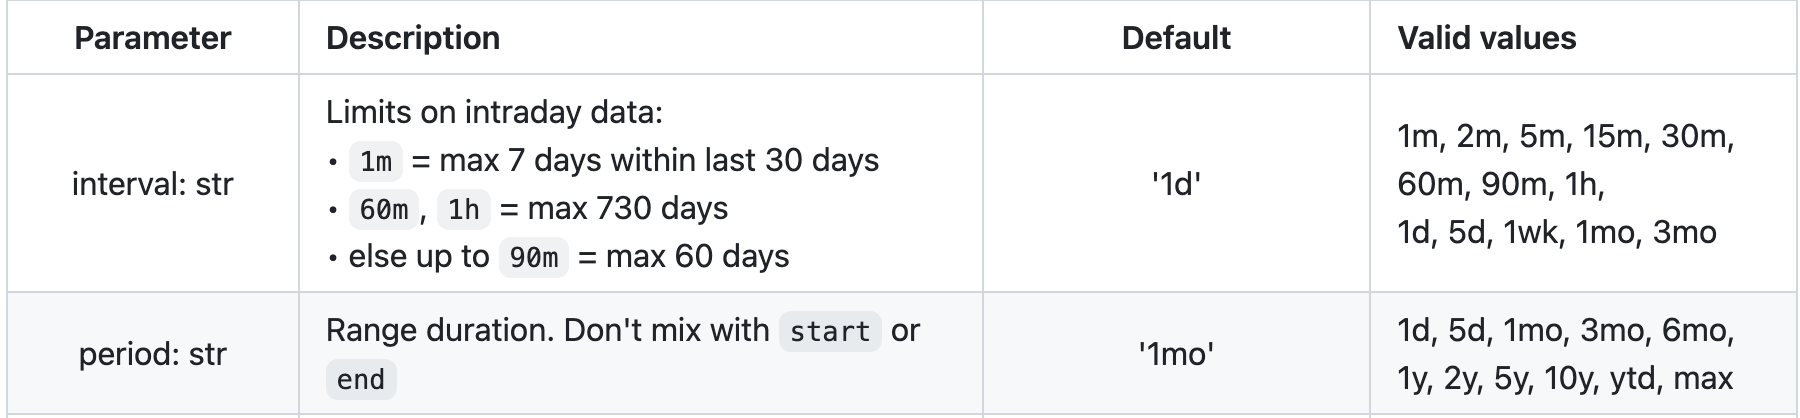

In [108]:
#tsla_data = yf.download("TSLA", interval="30m", period = "60d", auto_adjust=True)

In [109]:
tsla_data = pd.read_csv('data/TSLA-PRICE-60DAYS-2024-03-23-2024-05-20.csv')

In [110]:
tsla_data.shape

(520, 8)

In [111]:
tsla_data.info

<bound method DataFrame.info of                     Date        Open        High         Low       Close  \
0    2024-05-20 15:30:00  174.899994  175.020004  174.470001  174.970001   
1    2024-05-20 15:00:00  174.570007  174.929993  174.440308  174.908401   
2    2024-05-20 14:30:00  174.269897  174.679993  174.160095  174.550003   
3    2024-05-20 14:00:00  174.510696  174.529999  173.520004  174.263901   
4    2024-05-20 13:30:00  174.250000  174.580002  173.930099  174.511505   
..                   ...         ...         ...         ...         ...   
515  2024-03-25 11:30:00  171.179993  172.080002  170.880203  171.889999   
516  2024-03-25 11:00:00  169.961700  171.279999  169.960007  171.179901   
517  2024-03-25 10:30:00  170.589996  170.789993  169.550003  169.960007   
518  2024-03-25 10:00:00  172.589996  172.699905  170.070007  170.565002   
519  2024-03-25 09:30:00  168.729996  175.240005  168.729996  172.595001   

         Volume  Dividends  Stock Splits  
0     400196

In [112]:
#comparison_date = pd.Timestamp('2023-12-31',tz="America/New_York")

In [113]:
#comparison_date

In [114]:
#tsla_data_2024 = tsla_data[tsla_data.index > comparison_date]

In [115]:
tsla_data = tsla_data.drop(['Dividends','Stock Splits'], axis=1)

In [116]:
tsla_data

,Date,Open,High,Low,Close,Volume
0,2024-05-20 15:30:00,174.899994,175.020004,174.470001,174.970001,4001966.0
1,2024-05-20 15:00:00,174.570007,174.929993,174.440308,174.908401,2059514.0
2,2024-05-20 14:30:00,174.269897,174.679993,174.160095,174.550003,2096300.0
3,2024-05-20 14:00:00,174.510696,174.529999,173.520004,174.263901,3027271.0
4,2024-05-20 13:30:00,174.250000,174.580002,173.930099,174.511505,2216614.0
...,...,...,...,...,...,...
515,2024-03-25 11:30:00,171.179993,172.080002,170.880203,171.889999,4458923.0
516,2024-03-25 11:00:00,169.961700,171.279999,169.960007,171.179901,5016685.0
517,2024-03-25 10:30:00,170.589996,170.789993,169.550003,169.960007,7221877.0
518,2024-03-25 10:00:00,172.589996,172.699905,170.070007,170.565002,8642458.0


In [117]:
tsla_data_2024 = tsla_data

In [118]:
tsla_data_2024.shape

(520, 6)

In [120]:
#tsla_data_2024 = tsla_data_2024.set_index('Date')

In [119]:
tsla_data_2024

,Date,Open,High,Low,Close,Volume
0,2024-05-20 15:30:00,174.899994,175.020004,174.470001,174.970001,4001966.0
1,2024-05-20 15:00:00,174.570007,174.929993,174.440308,174.908401,2059514.0
2,2024-05-20 14:30:00,174.269897,174.679993,174.160095,174.550003,2096300.0
3,2024-05-20 14:00:00,174.510696,174.529999,173.520004,174.263901,3027271.0
4,2024-05-20 13:30:00,174.250000,174.580002,173.930099,174.511505,2216614.0
...,...,...,...,...,...,...
515,2024-03-25 11:30:00,171.179993,172.080002,170.880203,171.889999,4458923.0
516,2024-03-25 11:00:00,169.961700,171.279999,169.960007,171.179901,5016685.0
517,2024-03-25 10:30:00,170.589996,170.789993,169.550003,169.960007,7221877.0
518,2024-03-25 10:00:00,172.589996,172.699905,170.070007,170.565002,8642458.0


In [121]:
tsla_data_2024_ts = TimeSeries.from_dataframe(tsla_data_2024,
                                              time_col = 'Date',
                                               fill_missing_dates=True,
                                               freq='30min')

<Axes: xlabel='Date'>

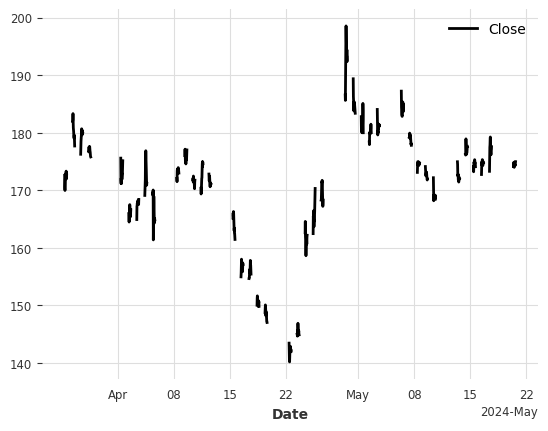

In [122]:
tsla_data_2024_ts['Close'].plot()

In [123]:
from darts.utils.missing_values import fill_missing_values

<Axes: xlabel='Date'>

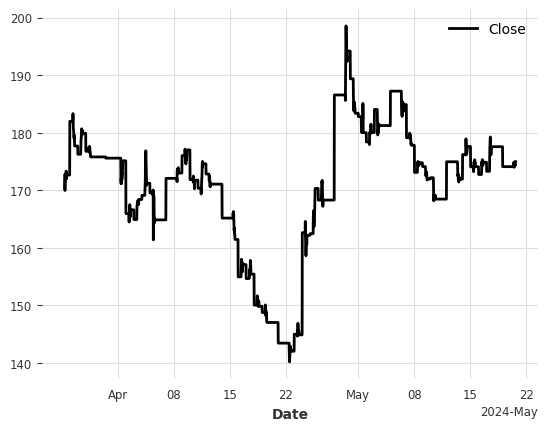

In [124]:
tsla_data_2024_ts_fm = fill_missing_values(tsla_data_2024_ts,fill='auto',method='nearest')
tsla_data_2024_ts_fm['Close'].plot()

In [125]:
tsla_data_2024_ts_fm.to_csv('data/prepared/tsla_stock_data.csv')

# Merge the data

In [126]:
news_score_data_df = news_score_data_ts.pd_dataframe()

In [127]:
news_score_data_df.shape

(2813, 1)

In [128]:
tsla_data_2024_ts_df = tsla_data_2024_ts_fm.pd_dataframe()

In [129]:
tsla_data_2024_ts_df.shape

(2701, 5)

In [130]:
tsla_data_2024_ts_df = tsla_data_2024_ts_df.tz_localize(None)

In [131]:
merged_df = pd.merge(tsla_data_2024_ts_df, news_score_data_df, left_index=True, right_index=True, how='left')

In [132]:
merged_df.shape

(2701, 6)

In [133]:
merged_df = merged_df.dropna()

In [134]:
merged_df.shape

(2701, 6)

In [135]:
merged_df.columns = merged_df.columns.str.lower()

In [136]:
merged_df_ts = TimeSeries.from_dataframe(merged_df,fill_missing_dates=True,freq='30min')

<Axes: xlabel='Date'>

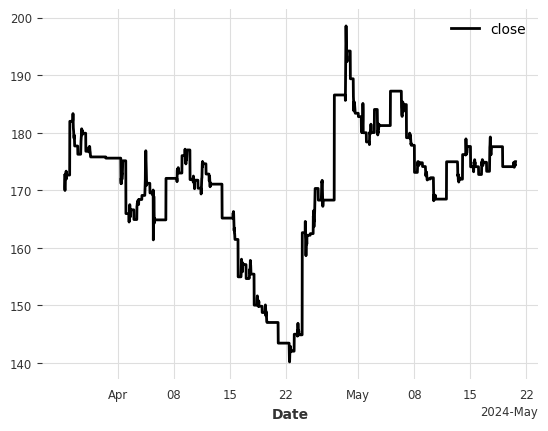

In [137]:
merged_df_ts['close'].plot()

<Axes: xlabel='Date'>

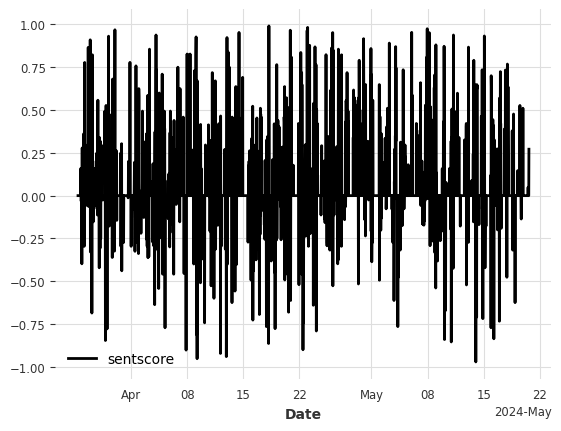

In [138]:
merged_df_ts['sentscore'].plot()

In [139]:
merged_df_ts.to_csv('data/prepared/tsla_data.csv')